# ML Feature enginerring - SelectKbest

In [8]:
%matplotlib inline
%run ../talibref.py
%run ensemble.py
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import pandas as pd
import time
pd.set_option('display.width', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.notebook_repr_html', True)
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

### Get data

In [43]:
#df=pd.read_csv("data/IYZ.csv")
ticker = 'IYF'
startdate=datetime.date(2010, 1, 1)
enddate=datetime.date(2015, 12, 1)
df = generate_ticker_data(ticker, startdate, enddate)

Available data: Ticker(IYF) from 2000-05-26 to 2015-12-04
Usable data: Ticker(IYF) from 2001-03-14 to 2015-12-04 
Returned data: Ticker(IYF) from 2010-01-04 to 2015-12-01 
Save path: data/IYF_from_2010-01-04_2015-12-01.csv


In [44]:
dftouse=df.copy()

### Feature Engineering

In [45]:
IGNORE = ['date', 'result_1','close_1','perf_1','result_14','close_14','perf_14','results']

In [46]:
INDICATORS=[]
for v in df.columns:
    l=df[v].unique()
    if len(l) <= 10 and v not in IGNORE:
        #print v, l
        INDICATORS.append(v)

In [47]:
STANDARDIZABLE = []
for v in df.columns:
    if v not in INDICATORS and v not in IGNORE:
        #print v
        STANDARDIZABLE.append(v)

In [48]:
################################################
# Code to add signals from other tickers
################################################

# Additional tickers to consider
moreTickers = [
               '^GSPC', #S&P500
               #'^dji',  #Dow Jones Industrials
               #'^IXIC', #Nasdaq
               'OIL'   #Oil price ETF
              ]

# Signals for additional tickers
STANDARDIZABLE_TO_ADD = ['roc','stoch_slowk']
INDICATORS_TO_ADD = ['cci_signal']


def addDataFromOtherTicker(tickerPlus):
    dfPlus = generate_ticker_data(tickerPlus, startdate, enddate)
    if df.shape == dfPlus.shape:
        dfPluss = dfPlus.copy()
        dfPluss = dfPluss[STANDARDIZABLE_TO_ADD+INDICATORS_TO_ADD]
        STANDARDIZABLE2 = STANDARDIZABLE_TO_ADD[:]
        INDICATORS2 = INDICATORS_TO_ADD[:]
        for p in STANDARDIZABLE2:
            renamed = p+'_'+tickerPlus
            dftouse[renamed]=dfPluss[p]*1.0
            STANDARDIZABLE.append(renamed)
        for p in INDICATORS2:
            renamed = p+'_'+tickerPlus
            dftouse[renamed]=dfPluss[p]
            INDICATORS.append(renamed)
    else:
        print "Data for additional tickers doesn't match data frame for sector of interest."

for tick in moreTickers:
    print "####### Loading data for "+tick+"...."
    addDataFromOtherTicker(tick)    
    time.sleep(0.5)
    
dftouse.head()

####### Loading data for ^GSPC....
Available data: Ticker(^GSPC) from 1950-01-03 to 2015-12-04
Usable data: Ticker(^GSPC) from 1962-05-28 to 2015-12-04 
Returned data: Ticker(^GSPC) from 2010-01-04 to 2015-12-01 
Save path: data/^GSPC_from_2010-01-04_2015-12-01.csv
####### Loading data for OIL....
Available data: Ticker(OIL) from 2006-08-16 to 2015-12-04
Usable data: Ticker(OIL) from 2007-06-05 to 2015-12-04 
Returned data: Ticker(OIL) from 2010-01-04 to 2015-12-01 
Save path: data/OIL_from_2010-01-04_2015-12-01.csv


,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,result_14,perf_14,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2,kama50,kama150,kama200,kama_signal1,kama_signal2,sar,sar_signal,adx,plus_di,minus_di,adx_trend,adx_direction,adx_signal,aroon_osc,aroon_signal,cci,cci_signal,macd,macd_sigline,macd_hist,macd_signal,ppo,ppo_signal,mfi,mfi_signal,roc,roc_signal,rsi,rsi_signal,ult_osc,ult_signal,willr,wr_signal,ad_osc,ad_signal,stoch_slowk,stoch_slowd,sslow_signal,stoch_fastk,stoch_fastd,srsi_signal,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal,roc_^GSPC,stoch_slowk_^GSPC,cci_signal_^GSPC,roc_OIL,stoch_slowk_OIL,cci_signal_OIL
0,2010-01-04,52.110001,52.750000,52.110001,52.599998,1161700,53.189999,True,0.011217,51.029999,False,-0.029848,1,52.664488,51.6690,50.673512,0.967609,3.853326,True,False,False,1,51.738168,49.705517,49.653648,1,1,51.825643,50.298741,48.506995,1,1,50.682158,1,9.350435,26.171087,18.965667,False,True,0,16,1,127.595205,1,0.108061,0.009205,0.098855,1,0.347160,1,61.368636,0,3.768000,0,56.548450,0,54.705025,0,-7.211628,0,307669.510159,1,43.910180,39.045896,0,100.000000,38.612125,0,0.008516,1,52.486666,54.443334,51.963335,54.966665,50.006667,56.923333,49.483336,1,3.367458,56.569007,1,11.120401,91.158111,0
1,2010-01-05,52.540001,53.250000,52.430000,53.189999,1386600,53.320000,True,0.002444,51.279999,False,-0.035909,1,52.913076,51.7255,50.537923,1.116592,4.591841,True,True,False,1,51.795103,49.751669,49.688836,1,1,51.834104,50.343337,48.604162,1,1,50.764871,1,10.483683,29.091181,17.374451,False,True,0,100,1,177.068013,1,0.198612,0.047087,0.151525,1,0.543799,1,61.598915,0,3.563080,0,60.582193,0,60.924108,0,-2.325618,0,688207.228721,1,63.551634,44.700589,0,100.000000,66.666667,0,0.008968,1,52.956666,55.383334,52.663333,55.676667,50.236665,58.103335,49.943332,1,3.088524,65.580311,1,10.696517,94.360616,0
2,2010-01-06,53.169998,53.490002,52.919998,53.320000,1707700,54.330002,True,0.018942,50.520000,False,-0.052513,1,53.185333,51.8225,50.459667,1.049407,5.259619,True,True,False,1,51.854903,49.798931,49.724967,1,1,51.840900,50.392491,48.682687,1,1,50.913979,1,11.823630,29.860259,16.347697,False,True,0,48,1,182.710610,1,0.277664,0.093202,0.184462,1,0.771193,1,75.308621,0,2.617400,0,61.431786,0,61.580731,0,-6.028431,0,1000566.077333,1,90.709973,66.057263,0,100.000000,100.000000,0,0.010048,1,53.243333,55.956668,52.996665,56.203336,50.283330,58.916671,50.036662,1,2.072615,95.490211,1,13.871370,96.383747,0
3,2010-01-07,53.389999,54.570000,53.270000,54.330002,2047200,54.139999,False,-0.003497,51.540001,False,-0.051353,0,53.682031,51.9895,50.296969,1.191421,6.511049,False,True,False,1,51.951965,49.858946,49.770788,1,1,51.873129,50.456439,48.794968,1,1,51.120061,1,14.113813,36.605399,14.275642,False,True,0,52,1,219.410378,0,0.417005,0.157963,0.259042,1,1.075476,1,76.509588,0,4.100408,0,67.324335,0,66.887223,0,-6.153792,0,1448262.302833,1,92.660606,82.307405,0,100.000000,100.000000,0,0.012152,1,54.056667,57.583336,53.543335,58.096668,50.016666,61.623337,49.503334,1,2.117129,96.100927,1,11.928517,90.221762,0
4,2010-01-08,54.040001,54.320000,53.720001,54.139999,1472200,54.150002,True,0.000185,51.250000,False,-0.053380,0,54.023896,52.1405,50.257104,1.030823,7.224311,False,True,False,1,52.037771,49.915648,49.814263,1,1,51.904265,50.516653,48.896870,1,1,51.465055,1,16.240413,34.401967,13.416332,False,True,0,52,1,163.809636,0,0.506266,0.227623,0.278643,1,1.277593,1,85.504365,0,4.336096,0,65.303039,0,71.908738,0,-11.054010,0,1687119.428607,1,88.132754,90.501111,0,81.242409,93.747470,0,0.014964,1,54.060000,57.590001,53.550000,58.100001,50.019999,61.630002,49.509999,1,2.176533,95.794862,1,8.644949,83.315586,0


In [49]:
dftouse['date'] = pd.to_datetime(dftouse['date'])
mask = (dftouse.date < '2015-01-01').values
mask.shape, mask.sum()

((1489,), 1258)

#### 1.2 Standardize the data

Use the mask to compute the training and test parts of the dataframe. Use `StandardScaler` from `sklearn.preprocessing` to "fit" the columns in `STANDARDIZABLE` on the training set. Then use the resultant estimator to transform both the training and the test parts of each of the columns in the dataframe, replacing the old unstandardized values in the `STANDARDIZABLE` columns of `dftouse` by the new standardized ones.

In [50]:
#your code here
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(dftouse[mask][STANDARDIZABLE])
dftouse[STANDARDIZABLE] = scaler.transform(dftouse[STANDARDIZABLE])
dftouse.head()

,date,open,high,low,close,volume,close_1,result_1,perf_1,close_14,result_14,perf_14,results,bb_upper,bb_middle,bb_lower,bb_pct,bb_bandwidth,bb_squeeze,bb_signalup,bb_signaldn,bb_signal,ema50,ema150,ema200,ema_signal1,ema_signal2,kama50,kama150,kama200,kama_signal1,kama_signal2,sar,sar_signal,adx,plus_di,minus_di,adx_trend,adx_direction,adx_signal,aroon_osc,aroon_signal,cci,cci_signal,macd,macd_sigline,macd_hist,macd_signal,ppo,ppo_signal,mfi,mfi_signal,roc,roc_signal,rsi,rsi_signal,ult_osc,ult_signal,willr,wr_signal,ad_osc,ad_signal,stoch_slowk,stoch_slowd,sslow_signal,stoch_fastk,stoch_fastd,srsi_signal,trix,trix_signal,sr_pivotpts,sr_res1,sr_sup1,sr_res2,sr_sup2,sr_res3,sr_sup3,cv_signal,roc_^GSPC,stoch_slowk_^GSPC,cci_signal_^GSPC,roc_OIL,stoch_slowk_OIL,cci_signal_OIL
0,2010-01-04,-0.935543,-0.917487,-0.897726,-0.895831,0.688673,53.189999,True,0.011217,51.029999,False,-0.029848,1,-1.079743,-0.965447,-0.849254,1.193088,-0.874884,True,False,False,1,-0.953065,-1.093327,-1.089583,1,1,-0.995905,-1.030878,-1.186425,1,1,-1.027989,1,-1.545029,0.009177,-0.686341,False,True,0,-0.055115,1,1.009144,1,-0.149048,-0.316316,0.438412,1,0.022942,1,0.404861,0,0.939130,0,0.194976,0,-0.019233,0,1.040230,0,0.280949,1,-0.518386,-0.759310,0,1.091492,-0.489237,0,-0.297070,1,-0.903820,-0.990859,-0.723568,-1.182353,-0.621990,-1.244645,-0.463696,1,1.022709,-0.171535,1,2.097356,1.481709,0
1,2010-01-05,-0.900955,-0.877128,-0.872107,-0.848413,0.974027,53.320000,True,0.002444,51.279999,False,-0.035909,1,-1.059083,-0.960819,-0.860136,1.653089,-0.689083,True,True,False,1,-0.948260,-1.089097,-1.086208,1,1,-0.995159,-1.027003,-1.177938,1,1,-1.021302,1,-1.413441,0.405111,-0.902749,False,True,0,1.295570,1,1.479051,1,-0.013143,-0.255080,0.678023,1,0.139169,1,0.418620,0,0.880120,0,0.563245,0,0.549174,0,1.196757,0,1.008509,1,0.213921,-0.530415,0,1.091492,0.364240,0,-0.292910,1,-0.866034,-0.917898,-0.671062,-1.123900,-0.604378,-1.152190,-0.431016,1,0.922154,0.160817,1,2.019937,1.603270,0
2,2010-01-06,-0.850280,-0.857755,-0.832878,-0.837965,1.381442,54.330002,True,0.018942,50.520000,False,-0.052513,1,-1.036456,-0.952874,-0.866416,1.445649,-0.521079,True,True,False,1,-0.943214,-1.084765,-1.082743,1,1,-0.994559,-1.022732,-1.171079,1,1,-1.009246,1,-1.257852,0.509390,-1.042389,False,True,0,0.459431,1,1.532646,1,0.105503,-0.180534,0.827860,1,0.273574,1,1.237776,0,0.607799,0,0.640810,0,0.609188,0,1.078135,0,1.605716,1,1.226486,0.334079,0,1.091492,1.378309,0,-0.282963,1,-0.842987,-0.873397,-0.646059,-1.080541,-0.600805,-1.088464,-0.424386,1,0.555921,1.263944,1,2.599800,1.680065,0
3,2010-01-07,-0.832584,-0.770579,-0.804857,-0.756793,1.812202,54.139999,False,-0.003497,51.540001,False,-0.051353,0,-0.995175,-0.939195,-0.879474,1.884133,-0.206235,False,True,False,1,-0.935023,-1.079264,-1.078348,1,1,-0.991717,-1.017176,-1.161272,1,1,-0.992584,1,-0.991925,1.423961,-1.324192,False,True,0,0.523750,1,1.881231,0,0.314634,-0.075848,1.167146,1,0.453425,1,1.309534,0,1.034851,0,1.178782,0,1.094186,0,1.074119,0,2.461678,1,1.299213,0.991867,0,1.091492,1.378309,0,-0.263602,1,-0.777598,-0.747139,-0.605054,-0.924668,-0.621225,-0.876392,-0.462275,1,0.571968,1.286468,1,2.244953,1.446167,0
4,2010-01-08,-0.780300,-0.790759,-0.768831,-0.772063,1.082637,54.150002,True,0.000185,51.250000,False,-0.053380,0,-0.966763,-0.926827,-0.882673,1.388268,-0.026787,False,True,False,1,-0.927782,-1.074067,-1.074179,1,1,-0.988970,-1.011944,-1.152371,1,1,-0.964691,1,-0.744993,1.125199,-1.441059,False,True,0,0.523750,1,1.353119,0,0.448602,0.036758,1.256314,1,0.572890,1,1.846973,0,1.102721,0,0.994244,0,1.553139,0,0.917137,0,2.918356,1,1.130398,1.323539,0,0.639597,1.188094,0,-0.237706,1,-0.777330,-0.746622,-0.604555,-0.924393,-0.620969,-0.875870,-0.461802,1,0.593383,1.275180,1,1.645234,1.184022,0


We create a list `lcols` of the columns we will use in our classifier. This list should not contain the response `RESP`. How many features do we have?

In [51]:
#lcols=list(dftouse.columns)
#lcols.remove(u'results')
lcols=[]
for c in list(dftouse.columns):
    if c not in IGNORE: 
        lcols.append(c)
print len(lcols)

76


### EDA for the data

We create a variable `ccols` which contains all variables not in our indicators list

In [52]:
ccols=[]
for c in lcols:
    if c not in INDICATORS and c not in IGNORE:
        ccols.append(c)
print len(ccols), len(INDICATORS)

48 28


In [53]:
def cv_optimize(clf, parameters, X, y, n_folds, score_func):
    fitmodel = GridSearchCV(clf, param_grid=parameters, cv=n_folds, scoring=score_func, n_jobs=2)
    fitmodel.fit(X, y)
    return fitmodel.best_estimator_

In [54]:
from sklearn.metrics import confusion_matrix
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=7):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask !=None:
        #print "using mask"
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        #print "using reuse split"
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    #print "############# based on standard predict ################"
    #print "Accuracy on training data: %0.2f" % (training_accuracy)
    #print "Accuracy on test data:     %0.2f" % (test_accuracy)
    #print confusion_matrix(ytest, clf.predict(Xtest))
    #print "########################################################"
    return clf, Xtrain, ytrain, Xtest, ytest

In [55]:
X=dftouse[lcols].values
y=dftouse['results'].values
Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]  
reuse_split=dict(Xtrain=Xtrain, Xtest=Xtest, ytrain=ytrain, ytest=ytest)

In [56]:
print "whole data set", dftouse['results'].mean()
print "training set", dftouse['results'][mask].mean(), "test set", dftouse['results'][~mask].mean()

whole data set 0.441907320349
training set 0.4586645469 test set 0.350649350649


#####our data is not very asymmetric, but we might still want to balance the trainset

### Balancing train set to test set for training, 


In [57]:
jtrain=np.arange(0, ytrain.shape[0])
n_pos=len(jtrain[ytrain==1])
n_neg=len(jtrain[ytrain==0])
print n_pos, n_neg

ineg = np.random.choice(jtrain[ytrain==0], n_pos, replace=False)
alli=np.concatenate((jtrain[ytrain==1], ineg))
Xtrain_new = Xtrain[alli]
ytrain_new = ytrain[alli]
print Xtrain_new.shape, ytrain_new.shape

reuse_split_balanced=dict(Xtrain=Xtrain_new, Xtest=Xtest, ytrain=ytrain_new, ytest=ytest)
#reuse_split=reuse_split_balanced

577 681
(1154, 76) (1154,)


## Test all classifiersres using SelectKbest

In [58]:
from sklearn.grid_search import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

def evaluate(clf):
    clf.fit(Xtrain,ytrain)
    training_accuracy = accuracy_score(ytrain, clf.predict(Xtrain))
    test_accuracy = accuracy_score(ytest, clf.predict(Xtest))
    df_pred = df[~mask].reset_index(drop=True)
    df_pred['pred_result'] = clf.predict(Xtest)
    df_pred['result_baseline'] = np.ones(df_pred.shape[0])
    _,_,ROI_base,baseline_over_time,_ = evaluate_profit(df_pred, startdate, enddate, 10000, 'result_baseline', 'close', True, [1])
    _,_,ROI_long,bal_over_time,_ = evaluate_profit(df_pred, startdate, enddate, 10000, 'pred_result', 'close', True, [1])
    _,_,ROI_lgst,_,signals = evaluate_profit(df_pred, startdate, enddate, 10000, 'pred_result', 'close', True, [1,0])
    return training_accuracy, test_accuracy, ROI_base, ROI_long, ROI_lgst, signals,bal_over_time,baseline_over_time

def print_result(clfpipe):     
    print "Number of features: {0}".format(clfpipe.get_params()['selectk__k'])
    print "Features: {0}".format(np.array(lcols)[clfpipe.named_steps['selectk'].get_support()].tolist())
    r = evaluate(clfpipe)
    print "train accuracy: {0}".format(r[0])
    print "test accuracy: {0}".format(r[1])
    print "ROI baseline: {0}".format(r[2])
    print "ROI long-only: {0}".format(r[3])
    print "ROI long-short: {0}".format(r[4])

In [59]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score


In [60]:
%%time
max_number_featrues = 20
Results={}
scoring_func="accuracy"


print "#############====================== Log Regression =====================#############"
selectk = SelectKBest(score_func=f_regression)
pipeLR = Pipeline([('selectk', selectk), ('LR', LogisticRegression(penalty="l1"))])
pipeLR, _,_,_,_  = do_classify(pipeLR, {"selectk__k":range(1,max_number_featrues+1), 
                                        "LR__C": [1e-3, 1e-2, 1e-1, 1, 1e2],
                                        "LR__random_state": [111]}, 
                               dftouse,lcols, u'results',1, reuse_split=reuse_split,score_func=scoring_func)

print pipeLR.get_params()['LR__C']
print_result(pipeLR)
Results["log_regression"] = evaluate(pipeLR)

#############====================== Log Regression =====================#############
100.0
Number of features: 1
Features: ['stoch_slowk']
train accuracy: 0.677265500795
test accuracy: 0.709956709957
ROI baseline: 0.01828
ROI long-only: 0.0769570088
ROI long-short: 0.1315380047
CPU times: user 11.2 s, sys: 1.44 s, total: 12.6 s
Wall time: 15 s


In [61]:
%%time
print "#############====================== RBF SVM ===========================#############"
pipesvm2 = Pipeline([('selectk', selectk), ('svm2', SVC())])
pipesvm2,_,_,_,_  = do_classify(pipesvm2, {"selectk__k":[2,3,4,5,6,7,9,12,18,25], 
                                            "svm2__C": [1e-2,1e-1,1,1e2,1e4,1e5,1e6,1e7, 1e8,1e9], 
                                            "svm2__gamma": [ 1e-7,1e-8, 1e-9, 1e-10],
                                            "svm2__random_state": [111]}, 
                                 dftouse,lcols, u'results',1, reuse_split=reuse_split,score_func=scoring_func)
print pipesvm2.get_params()['svm2__C'], pipesvm2.get_params()['svm2__gamma']
print_result(pipesvm2)
Results["RBF_SVM"] = evaluate(pipesvm2)

#############====================== RBF SVM ===========================#############
1000000.0 1e-08
Number of features: 25
Features: ['bb_pct', 'sar_signal', 'plus_di', 'minus_di', 'adx_direction', 'cci', 'macd', 'macd_hist', 'macd_signal', 'mfi', 'roc', 'rsi', 'ult_osc', 'willr', 'wr_signal', 'ad_osc', 'ad_signal', 'stoch_slowk', 'stoch_slowd', 'sslow_signal', 'stoch_fastk', 'stoch_fastd', 'srsi_signal', 'roc_^GSPC', 'stoch_slowk_^GSPC']
train accuracy: 0.683624801272
test accuracy: 0.718614718615
ROI baseline: 0.01828
ROI long-only: 0.0687748997
ROI long-short: 0.1158897896
CPU times: user 43.4 s, sys: 4.89 s, total: 48.3 s
Wall time: 1min 55s


In [62]:
%%time
print "#############====================== Random Forest =====================#############"
pipeRF = Pipeline([('selectk', selectk), ('RF', RandomForestClassifier())])
pipeRF,_,_,_,_  = do_classify(pipeRF, {"selectk__k": [5,6,7,8,9,10],
                                       "RF__max_depth": [3,5,7], 
                                       "RF__n_estimators": [5,10,20],
                                       "RF__max_features": [1,2,3],
                                       "RF__random_state": [111]}, 
                              dftouse, lcols, u'results', 1, reuse_split=reuse_split,score_func=scoring_func)

print pipeRF.get_params()['RF__max_depth'], pipeRF.get_params()['RF__n_estimators'], pipeRF.get_params()['RF__max_features']
print_result(pipeRF)
Results["Random_forest"] = evaluate(pipeRF)

#############====================== Random Forest =====================#############
7 10 1
Number of features: 10
Features: ['bb_pct', 'plus_di', 'cci', 'rsi', 'ult_osc', 'willr', 'stoch_slowk', 'stoch_slowd', 'stoch_fastd', 'stoch_slowk_^GSPC']
train accuracy: 0.813990461049
test accuracy: 0.718614718615
ROI baseline: 0.01828
ROI long-only: 0.0583968405
ROI long-short: 0.0910086369
CPU times: user 18.5 s, sys: 2.06 s, total: 20.5 s
Wall time: 36.6 s


In [63]:
%%time
print "#############====================== Extra Trees= =====================#############"
pipeET = Pipeline([('selectk', selectk), ('ET', ExtraTreesClassifier())])
pipeET, _,_,_,_  = do_classify(pipeET, {"selectk__k": [5,6,7,8,9,10,15],
                                        "ET__max_depth": [1,2,3,5,7,10,15], 
                                        "ET__n_estimators": [3,5,10],
                                        "ET__max_features": [1,2,3],
                                        "ET__random_state": [111]}, 
                               dftouse, lcols, u'results', 1, reuse_split=reuse_split,score_func=scoring_func)
print "ET__max_depth: {0}".format(pipeET.get_params()['ET__max_depth']) 
print "ET__n_estimators: {0}".format(pipeET.get_params()['ET__n_estimators']) 
print "ET__max_features: {0}".format(pipeET.get_params()['ET__max_features']) 
print_result(pipeET)
Results["Extra_Trees"] = evaluate(pipeET)

#############====================== Extra Trees= =====================#############
ET__max_depth: 5
ET__n_estimators: 3
ET__max_features: 3
Number of features: 15
Features: ['bb_pct', 'sar_signal', 'plus_di', 'minus_di', 'adx_direction', 'cci', 'rsi', 'ult_osc', 'willr', 'stoch_slowk', 'stoch_slowd', 'stoch_fastk', 'stoch_fastd', 'srsi_signal', 'stoch_slowk_^GSPC']
train accuracy: 0.714626391097
test accuracy: 0.709956709957
ROI baseline: 0.01828
ROI long-only: 0.1002187901
ROI long-short: 0.1807325517
CPU times: user 48.5 s, sys: 6.81 s, total: 55.3 s
Wall time: 1min 4s


In [64]:
%%time
print "#############====================== Gaussian NB ==========================#############"
pipeNB = Pipeline([('selectk', selectk), ('NB', GaussianNB())])
pipeNB,_,_,_,_ = do_classify(pipeNB, {"selectk__k":range(1,max_number_featrues+1)}, 
                             dftouse, lcols, u'results',1, reuse_split=reuse_split,score_func=scoring_func)
print_result(pipeNB)
Results["Gaussian_NB"] = evaluate(pipeNB)

#############====================== Gaussian NB ==========================#############
Number of features: 1
Features: ['stoch_slowk']
train accuracy: 0.678060413355
test accuracy: 0.718614718615
ROI baseline: 0.01828
ROI long-only: 0.0769890405
ROI long-short: 0.1327470929
CPU times: user 2.27 s, sys: 228 ms, total: 2.5 s
Wall time: 2.79 s


In [65]:
#%%time
#print "#############====================== Gradient Boosting ====================#############"
#pipeGB = Pipeline([('selectk', selectk), ('GB', GradientBoostingClassifier())])
#pipeGB, _,_,_,_  = do_classify(pipeGB, {"selectk__k":range(1,max_number_featrues+1), 
#                                        "GB__n_estimators": [5,10,20,40],
#                                        "GB__learning_rate": [0.1,0.5,1.0],
#                                        "GB__random_state": [111]}, 
#                               dftouse,lcols, u'results',1, reuse_split=reuse_split)
#print pipeGB.get_params()['GB__n_estimators'], pipeGB.get_params()['GB__learning_rate']
#print_result(pipeGB)
#Long_ROI_result["Gradient_bossting"] = evaluate(pipeGB)[3]
#Test_set_accuracies["Gradient_bossting"] = evaluate(pipeGB)[1]

In [66]:
print "#############====================== ENSEMBLE ==========================#############"
eclf = EnsembleClassifier(clfs=[pipeLR, pipesvm2, pipeRF, pipeET, pipeNB], voting='hard')
r = evaluate(eclf)
Results["Ensemble"] = r
print "train accuracy: {0}".format(r[0])
print "test accuracy: {0}".format(r[1])
print "ROI baseline: {0}".format(r[2])
print "ROI long-only: {0}".format(r[3])
print "ROI long-short: {0}".format(r[4])

#############====================== ENSEMBLE ==========================#############
train accuracy: 0.711446740859
test accuracy: 0.727272727273
ROI baseline: 0.01828
ROI long-only: 0.0762380028
ROI long-short: 0.130898007


In [67]:
print "---Test accuracy results---"
for key, value in Results.iteritems():
    print key, value[1]

---Test accuracy results---
RBF_SVM 0.718614718615
Extra_Trees 0.709956709957
Gaussian_NB 0.718614718615
log_regression 0.709956709957
Random_forest 0.718614718615
Ensemble 0.727272727273


In [68]:
print "ROI baseline: {0}".format(evaluate(pipeNB)[2])
print "---Long ROI results---"
for key, value in Results.iteritems():
    print key, value[3]

ROI baseline: 0.01828
---Long ROI results---
RBF_SVM 0.0687748997
Extra_Trees 0.1002187901
Gaussian_NB 0.0769890405
log_regression 0.0769570088
Random_forest 0.0583968405
Ensemble 0.0762380028


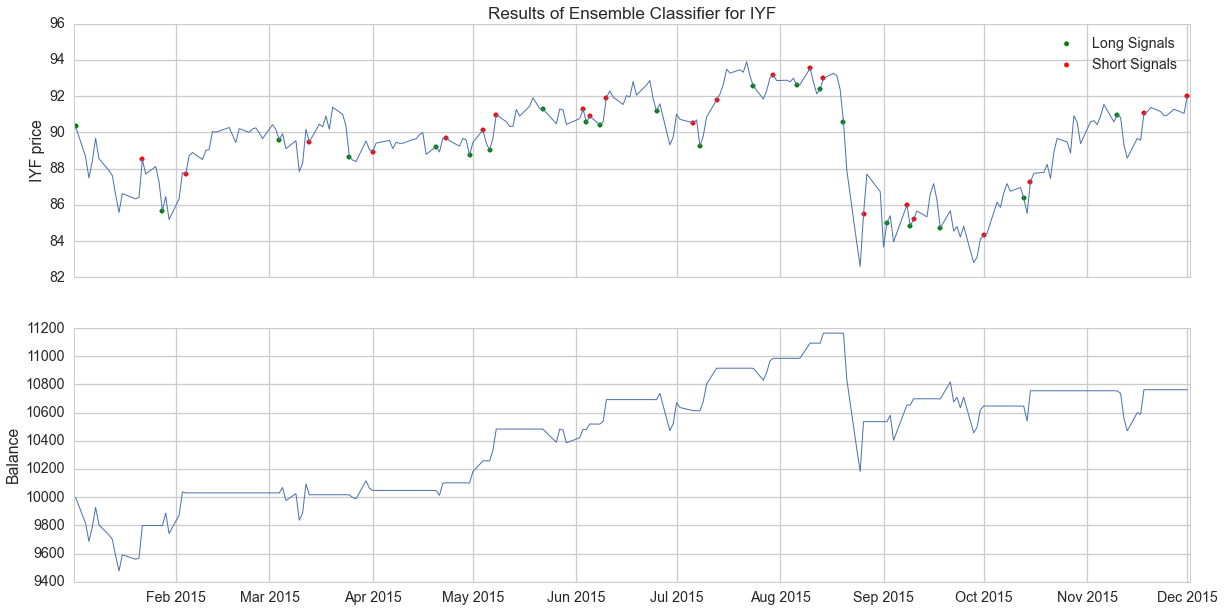

In [69]:
def plot_signal(model, title):
    fig, (ax0,ax1) = plt.subplots(nrows=2, ncols=1, figsize=(20, 10),sharex=True)
    ax0.plot(df.date[~mask], df.close[~mask], lw=1)
    short_days=zip(*evaluate(model)[5][0])[0]
    short_prices=zip(*evaluate(model)[5][0])[1]
    long_days=zip(*evaluate(model)[5][1])[0]
    long_prices=zip(*evaluate(model)[5][1])[1]
    ax0.scatter(long_days, long_prices, color='g', label="Long Signals") 
    ax0.scatter(short_days, short_prices, color='r', label="Short Signals")
    ax0.legend(frameon=False, loc='upper right')
    ax0.set_title(title)
    ax0.set_ylabel(ticker + " price")
    
    ax1.plot(zip(*evaluate(model)[6])[0], zip(*evaluate(model)[6])[1], lw=1)
    ax1.set_ylabel("Balance")
plot_signal(eclf, 'Results of Ensemble Classifier for '+ticker)

In [70]:
Results={}
Results["log_regression"] = evaluate(pipeLR)
Results["RBF_SVM"] = evaluate(pipesvm2)
Results["Random_forest"] = evaluate(pipeRF)
Results["Extra_Trees"] = evaluate(pipeET)
Results["Gaussian_NB"] = evaluate(pipeNB)
Results["Ensemble"] = evaluate(eclf)

Results2=Results

for aModel, value in Results2.iteritems():
    for j in [6,7]:
        i=0
        for item in Results2[aModel][j]:
            aDate = item[0]
            aVal = item[1]
            conv = int(time.mktime(aDate.timetuple()))*1000
            #conv = int(aDate.strftime("%s"))
            Results2[aModel][j][i]=[conv,aVal]
            i=i+1
    #remove signals for now
    Results2[aModel][5][0]=[]
    Results2[aModel][5][1]=[]
Results2

{'Ensemble': (0.71144674085850557,
  0.72727272727272729,
  0.018280000000000109,
  0.07623800280000069,
  0.13089800700000015,
  {0: [], 1: []},
  [[1420174800000, 9999.0],
   [1420434000000, 9814.2000000000007],
   [1420520400000, 9685.5001100000009],
   [1420606800000, 9786.7000000000007],
   [1420693200000, 9927.4997800000019],
   [1420779600000, 9803.2001100000016],
   [1421038800000, 9731.7000000000007],
   [1421125200000, 9700.9001100000005],
   [1421211600000, 9583.2001100000016],
   [1421298000000, 9476.5],
   [1421384400000, 9590.9001100000005],
   [1421730000000, 9559.0],
   [1421816400000, 9568.8995600000017],
   [1421902800000, 9798.8000000000011],
   [1421989200000, 9798.8000000000011],
   [1422248400000, 9798.8000000000011],
   [1422334800000, 9798.8000000000011],
   [1422421200000, 9797.8000000000011],
   [1422507600000, 9886.7198860000008],
   [1422594000000, 9741.9402280000013],
   [1422853200000, 9871.9002280000004],
   [1422939600000, 10037.199886],
   [142302600000

In [71]:
# Save results for this ticker to a JSON file
import json
fd = open("../ML_results/"+ticker+".json","w")
json.dump(Results, fd)
fd.close()

# Save time series
for aModel, value in Results2.iteritems():
    # Baseline
    fd = open("../ML_results/time_series/"+ticker+"_Index.json","w")
    json.dump(Results2[aModel][7], fd)
    fd.close()
    
    # Mode
    fd = open("../ML_results/time_series/"+ticker+"_Ensemble.json","w")
    json.dump(Results2[aModel][6], fd)
    fd.close()

In [72]:
# Load results from all files
import glob
result_files = glob.glob("../ML_results/*.json")
print result_files
accuracies_all= {}
ROI_diff_all={}
ROI_all={}
for aFile in result_files:
    file_tickr = aFile[14:17]
    #print file_tickr
    with open(aFile, "r") as fd:
        result_dict = json.load(fd)
        models_acc = {}
        models_ROI_diff = {}
        models_ROI = {}
        for key, value in result_dict.iteritems():
            models_acc[key] =  value[1]
            models_ROI_diff[key] =  value[3]-value[2]
            models_ROI[key] =  value[3]
            accuracies_all[file_tickr] =  models_acc
            ROI_diff_all[file_tickr] =  models_ROI_diff
            ROI_all[file_tickr] =  models_ROI
accuracies_df=pd.DataFrame(accuracies_all)
ROI_diff_df=pd.DataFrame(ROI_diff_all)
ROI_all_df=pd.DataFrame(ROI_all)

['../ML_results/ITB.json', '../ML_results/IYE.json', '../ML_results/IYF.json', '../ML_results/IYH.json', '../ML_results/IYJ.json', '../ML_results/IYM.json', '../ML_results/IYR.json', '../ML_results/IYW.json', '../ML_results/IYZ.json']


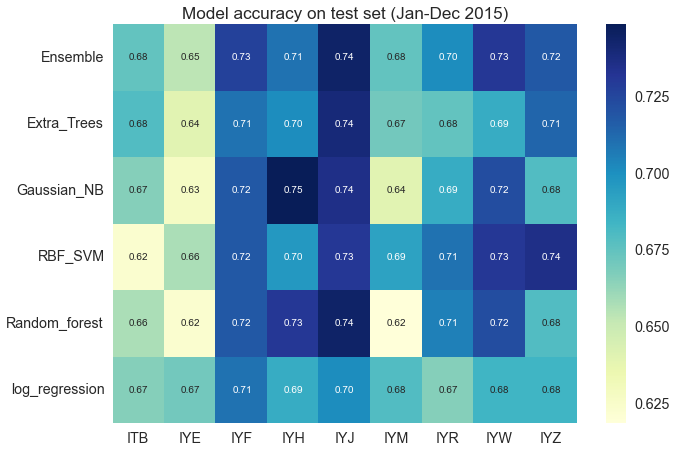

In [73]:
sns.set_context("talk", font_scale=1.1, rc={"lines.linewidth": 2.5})
ax = sns.heatmap(accuracies_df, annot=True, fmt='.2f',cmap="YlGnBu")
ax.set_title("Model accuracy on test set (Jan-Dec 2015)")

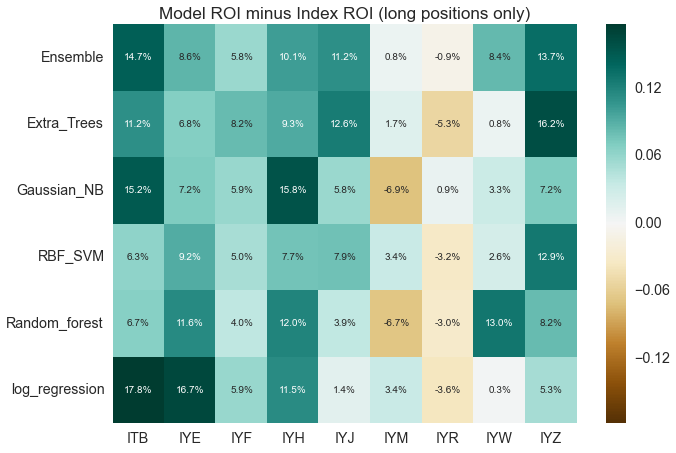

In [74]:
ax2 = sns.heatmap(ROI_diff_df, annot=True, fmt='.1%',cmap="BrBG")
ax2.set_title("Model ROI minus Index ROI (long positions only)")

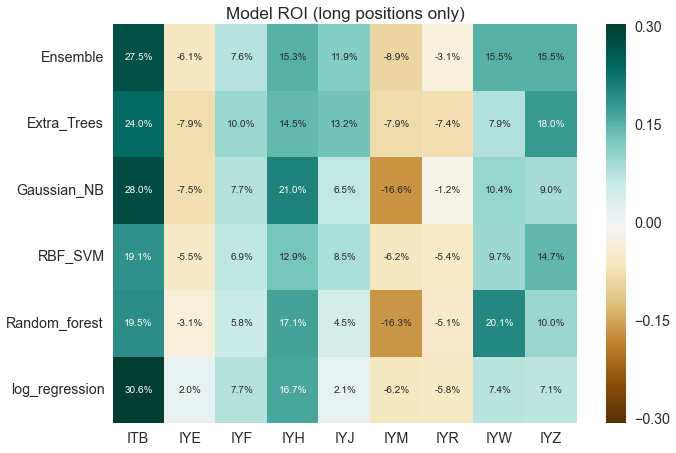

In [75]:
ax2 = sns.heatmap(ROI_all_df, annot=True, fmt='.1%',cmap="BrBG")
ax2.set_title("Model ROI (long positions only)")

In [76]:
def print_arrays_for_heatmap(aDict):
    y=0
    xcategories=[]
    ycategories=[]
    data_array=[]
    for atickr, resDict in aDict.iteritems():
        ycategories.append(atickr)
        x=0
        for aModel, value in resDict.iteritems():
            data_array.append([x,y,round(value,2)])
            x=x+1
        y=y+1
    for aModel, value in resDict.iteritems():
            xcategories.append(str(aModel))    
            
    print xcategories
    print ycategories
    print data_array
print_arrays_for_heatmap(accuracies_all)

['RBF_SVM', 'Extra_Trees', 'Gaussian_NB', 'log_regression', 'Random_forest', 'Ensemble']
['IYE', 'IYF', 'IYM', 'ITB', 'IYH', 'IYJ', 'IYW', 'IYR', 'IYZ']
[[0, 0, 0.66], [1, 0, 0.64], [2, 0, 0.63], [3, 0, 0.67], [4, 0, 0.62], [5, 0, 0.65], [0, 1, 0.72], [1, 1, 0.71], [2, 1, 0.72], [3, 1, 0.71], [4, 1, 0.72], [5, 1, 0.73], [0, 2, 0.69], [1, 2, 0.67], [2, 2, 0.64], [3, 2, 0.68], [4, 2, 0.62], [5, 2, 0.68], [0, 3, 0.62], [1, 3, 0.68], [2, 3, 0.67], [3, 3, 0.67], [4, 3, 0.66], [5, 3, 0.68], [0, 4, 0.7], [1, 4, 0.7], [2, 4, 0.75], [3, 4, 0.69], [4, 4, 0.73], [5, 4, 0.71], [0, 5, 0.73], [1, 5, 0.74], [2, 5, 0.74], [3, 5, 0.7], [4, 5, 0.74], [5, 5, 0.74], [0, 6, 0.73], [1, 6, 0.69], [2, 6, 0.72], [3, 6, 0.68], [4, 6, 0.72], [5, 6, 0.73], [0, 7, 0.71], [1, 7, 0.68], [2, 7, 0.69], [3, 7, 0.67], [4, 7, 0.71], [5, 7, 0.7], [0, 8, 0.74], [1, 8, 0.71], [2, 8, 0.68], [3, 8, 0.68], [4, 8, 0.68], [5, 8, 0.72]]
